### Programming Exercise 5: Regularized Linear Regression and Bias v.s. Variance

In the first half of the exercise, you will implement regularized linear regression
to predict the amount of water flowing out of a dam using the change
of water level in a reservoir.

In [1]:

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.io 
import scipy.misc 
import matplotlib.cm as cm 
import random 
from scipy.special import expit as sigmoid
#sigmoid will be vectorized

In [2]:
data = 'ex5data1.mat'
mat = scipy.io.loadmat(data)

X, Y,Xval,Yval,Xtest,Ytest= mat['X'], mat['y'],mat['Xval'],mat['yval'],mat['Xtest'],mat['ytest']

Y=np.reshape(Y,12)
Yval=np.reshape(Yval,len(Yval))
Ytest=np.reshape(Ytest,len(Ytest))

#### 1.1 Visualizing the dataset

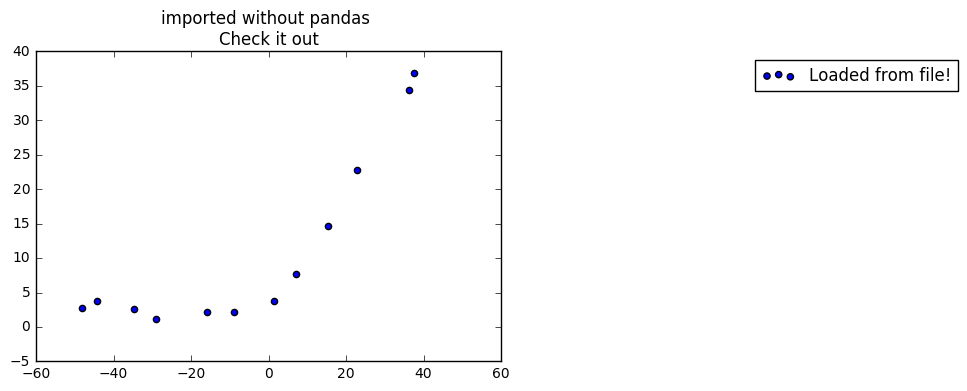

In [3]:
plt.scatter(X,Y.T, label='Loaded from file!')
plt.title('imported without pandas \nCheck it out')
plt.legend(bbox_to_anchor=(2, 1))

plt.show()

In [4]:
X =     np.insert(X    ,0,1,axis=1)
Xval =  np.insert(Xval ,0,1,axis=1)
Xtest = np.insert(Xtest,0,1,axis=1)

#### 1.2 Regularized linear regression cost function

In [186]:
def cost_function_lin_reg(theta_array, X,Y,l=0):
    
    #if type(Y)==np.float64:
    #    m=1
        
    #    return ((np.dot(X,theta_array)-Y)**2 +l*np.dot(theta_array[1:],theta_array[1:].T))/(m*2) 
    #else:    
    
    m=len(Y)
        
    try:
        cost=(sum((np.dot(X,theta_array)-Y)**2)+l*np.dot(theta_array[1:],theta_array[1:].T))/(m*2)
    except ValueError:
            import pdb;pdb.set_trace()
    

    return cost

In [243]:
theta_array=np.array([1,1])

In [244]:
cost_function_lin_reg(theta_array,X,Y,l=1)

303.99319222026429

When you are finished, the next part of ex5.m will run your cost function
using theta initialized at [1; 1]. You should expect to see an output of
303.993.

#### 1.3 Regularized linear regression gradient

In [245]:
def gradient_function(theta_array,X,Y, l=0):

    common_term_for_derivatives_list=[]
    
      
    m=len(Y)
        
    for i in range(0,len(Y)):
        #X[i] i:th row of X
        h_theta=np.dot(theta_array,X[i])

        #do some work on the gradient
        common_term_for_derivatives=(h_theta-Y[i])
        common_term_for_derivatives_list.append(common_term_for_derivatives)
        #

    #gradient
    gradient=[]
    #datastructure change so that we can use dot prodcut
    common_term_for_derivatives_array=np.array(common_term_for_derivatives_list)
    #import pdb; pdb.set_trace()
    for j in range(0, len(theta_array)):
        #Note that you should not regularize the parameter theta_array[0]!! hence the if-else clausul below
        if j==0:
            derivative=np.dot(common_term_for_derivatives_array,X[:,j])/m
            
        else:
            derivative=np.dot(common_term_for_derivatives_array,X[:,j])/m +(l/m)*theta_array[j]

        gradient.append(derivative)

    gradient=np.array(gradient)

    return gradient

In [246]:
gradient_function(theta_array,X,Y,l=1)

array([ -15.30301567,  598.25074417])

will run your gradient function using theta initialized at [1; 1].
You should expect to see a gradient of [-15.30; 598.250].

#### 1.4 Fitting linear regression

In [247]:
theta_array=np.array([1,1], dtype=float)

In [248]:
def gradient_descent(theta_array, X, Y,alpha=0.01, treshold=0.001,l=0):

        cost=cost_function_lin_reg(theta_array,X,Y,l)
        gradient=gradient_function(theta_array,X,Y,l)
        counter=0
        cost_old=treshold+1
        cost_list=[]
        #making a copy of theta array so not to modify the inital one during descent
        theta_array_copy=np.copy(theta_array)
        while abs(cost-cost_old)>treshold and counter <10000:
        
            counter=counter+1
            cost_list.append(cost)
            cost_old=cost
            
            
            gradient=gradient_function(theta_array_copy,X,Y)
            
            gradient_length=len(gradient)
                
            for i in range(0, gradient_length ):
                #import pdb; pdb.set_trace()
                theta_array_copy[i]=theta_array_copy[i]-alpha*gradient[i]
            
            cost=cost_function_lin_reg(theta_array_copy, X, Y)
        print('it took {counter} iterations'.format(counter=counter))

        return theta_array_copy, cost, cost_list 

In [249]:
theta_array_opti,cost,cost_list=gradient_descent(theta_array,X,Y, alpha=0.002)

it took 1448 iterations


In [250]:
theta_array_opti

array([ 12.36069615,   0.36341786])

In [251]:
cost

22.630266470372579

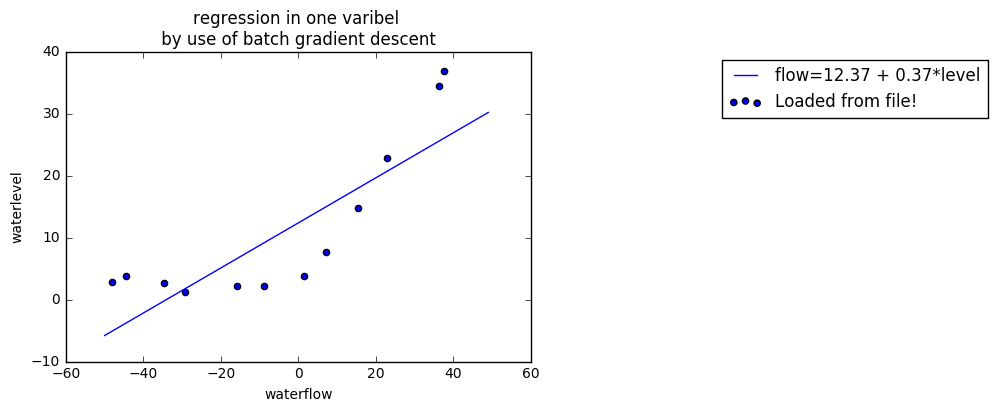

In [252]:

theta0=theta_array_opti[0]
theta1=theta_array_opti[1]
import math
x=range(-50, 50)
y=[]
for i in x:
    y.append(theta0+theta1*i)

#similiar code to plot2
plt.scatter(X[:,1:],Y.T, label='Loaded from file!')
plt.legend(bbox_to_anchor=(2, 1))
plt.xlabel('waterflow')
plt.ylabel('waterlevel')
plt.title('regression in one varibel \n by use of batch gradient descent ')

#regression plot
theta0_rounded=math.ceil(theta0*100)/100
theta1_rounded=math.ceil(theta1*100)/100
plt.plot(x,y, label='flow={theta0} + {theta1}*level'.format(theta0=theta0_rounded, theta1=theta1_rounded))
plt.legend(bbox_to_anchor=(2, 1))  # location. damn that took time.
plt.show()

#### 2 Bias-variance

In [253]:
X_poly_feat.shape
        

(12, 9)

In [254]:
def learning_curve2(theta_array, X,Y,Xval,Yval,l=0):
    
    #more inefficient but i ran into problems on the first
    cost_lst=[]
    cost_lst_val=[]
    
    cost=0
    cost_val=0
    
    for i in range(1,len(X)+1):
        
        #we train the parameter only til 0-i, but we use the entire cross validation set to get the corresponding cost  
        #regularization: notice, theta_arrays gets trained with regularization, however the cost ignores this. am not really sure why.
    
        theta_array_opti=gradient_descent(theta_array,X[0:i],Y[0:i], alpha=0.0002,l=l)
        theta_array=theta_array_opti[0] #get rid of the gorilla holding the banana and keep the banana

        
      
        cost=cost_function_lin_reg(theta_array,X[0:i],Y[0:i],l=0)
        cost_lst.append(cost)
        cost_val=cost_function_lin_reg(theta_array,Xval,Yval,l=0)
        cost_lst_val.append(cost_val)
        
        
    return cost_lst,cost_lst_val    

In [255]:
cost_lst,cost_lst_val=learning_curve2(theta_array, X,Y,Xval,Yval, l=0)

it took 93 iterations
it took 21 iterations
it took 8879 iterations
it took 763 iterations
it took 3962 iterations
it took 9 iterations
it took 11 iterations
it took 10 iterations
it took 5 iterations
it took 15 iterations
it took 11 iterations
it took 5 iterations


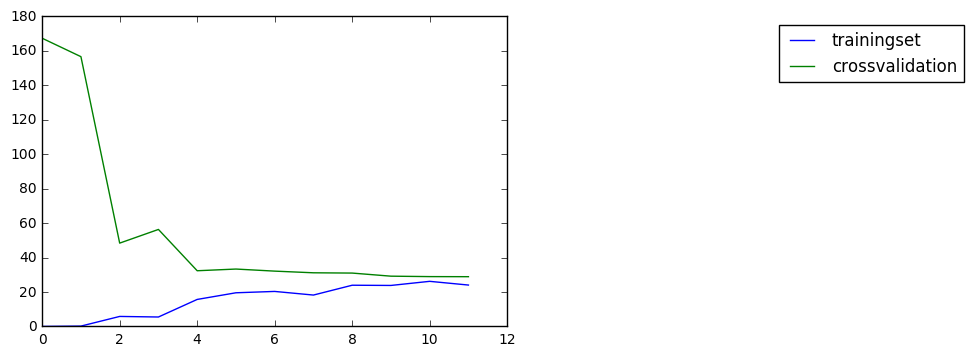

In [256]:
plt.plot(range(12),cost_lst, label='trainingset')
plt.plot(range(12),cost_lst_val[0:12], label='crossvalidation')
plt.legend(bbox_to_anchor=(2, 1))  
axes = plt.gca()
#axes.set_xlim([xmin,xmax])
axes.set_ylim([0,180])
axes.set_xlim([0,12])
plt.show()

#### 3 Polynomial regression

In [257]:

#the pdf assumes:
    # Specifically, when a training set X of size m × 1
    #is passed into the function, the function should return a m×p matrix X poly

#i assume:
    #im assuming that X already have 1's as a zeroth colum

def poly_features(X,p):
    
    
    holder=np.zeros((len(X),p+1))
    holder[:,0]=X[:,0]
    
    for i in range(1,p+1):
        
        column=X[:,1]**i
        
        holder[:,i]=column

    return holder    

In [258]:
#X_poly=poly_features(X,3)

In [259]:
#X_poly[:,1]**3==X_poly[:,3] #minitest

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True], dtype=bool)

#### 3.1 Learning Polynomial Regression

In [260]:
#For this part of the exercise, you will be using a polynomial of degree 8.
#you will need to use feature normalization

In [314]:
X_poly=poly_features(X,8)

In [315]:




#recall from ex1

def feat_normal(X):
    
    #these lists will save the relevant info from the feat_norm and use it to create a new function that will be used for predictions.
    mean_lst=[]
    std_lst=[]
    
    row_length=len(X[0:1][0])
    
    for i in range(0, row_length):
        if not X[:,i].std()==0:
            mean=X[:,i].mean()
            std=X[:,i].std()

            mean_lst.append(mean)
            std_lst.append(std)
            
            temp=(X[:,i]-mean)/std
            X[:,i]=temp
            
    def feat_norm_predictor(arg_list):
        #args  must be in the same order as before when this get called!
        #the predictor is used for prediction of new points
        lst=[]        
        for i in range(0,len(arg_list)):
            modified_arg=(arg_list[i]-mean_lst[i])/std_lst[i]
            lst.append(modified_arg)
        return lst
    
    def feat_norm_inverse(X_feat):
        #input will be a column with the orignal observation. 0th index contains its std and mean.
        
        inverse=X_feat*std_lst[0]+mean_lst[0]
        
        return inverse

            
    return X, feat_norm_inverse ,feat_norm_predictor

In [316]:
X_poly_feat,feat_norm_inverse, X_poly_feat_predictor=feat_normal(X_poly)

In [317]:
X_poly_feat.shape

(12, 9)

In [318]:
theta_array=np.ones(X_poly_feat.shape[1],dtype=float)

In [319]:
theta_array_opti,cost,cost_list=gradient_descent(theta_array,X_poly_feat,Y, alpha=0.002)

it took 1526 iterations


In [320]:
sum((np.dot(X_poly_feat,theta_array_opti)-Y)**2)/len(Y) #minitest

5.7019307959660175

In [321]:
#time to plot

In [322]:
def plot_regression(theta_array_opti,X_poly_feat,feat_norm_inverse,Y):
    
    y=np.dot(X_poly_feat,theta_array_opti)
    
    x=feat_norm_inverse(X_poly_feat[:,1])
    #take the 1st column (which contains the orignal observations) and return its inverse from
    #the feature transformation.
    
    #similiar code to plot2
    plt.scatter(x,Y.T, label='Loaded from file!')
    plt.legend(bbox_to_anchor=(2, 1))
    plt.xlabel('waterflow')
    plt.ylabel('waterlevel')
    plt.title('regression in one varibel \n by use of batch gradient descent ')

    #regression plot
    plt.scatter(x,y, label='predictions', color='red')
    plt.legend(bbox_to_anchor=(2, 1))
    #some trouble using plot since X is unsorted. will leave it for now since it is not the main lesson.
    
    plt.show()

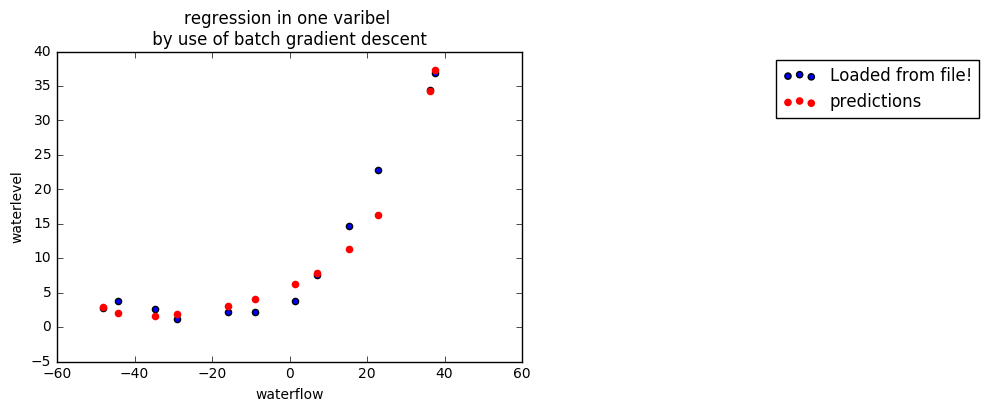

In [323]:
plot_regression(theta_array_opti, X_poly_feat,feat_norm_inverse,Y)

learning curve next. X_poly_feat is done so need to do Xval_feat_poly

In [333]:
Xval_poly=poly_features(Xval,8)

In [334]:
Xval_poly_feat,feat_norm_inverse, X_poly_feat_predictor=feat_normal(Xval_poly)


In [335]:
Xval_poly_feat.shape

(21, 9)

In [336]:
cost_lst,cost_lst_val=learning_curve2(theta_array, X_poly_feat,Y,Xval_poly_feat,Yval, l=0)

it took 1516 iterations
it took 1 iterations
it took 5184 iterations
it took 558 iterations
it took 2902 iterations
it took 1 iterations
it took 1404 iterations
it took 18 iterations
it took 1 iterations
it took 338 iterations
it took 36 iterations
it took 1418 iterations


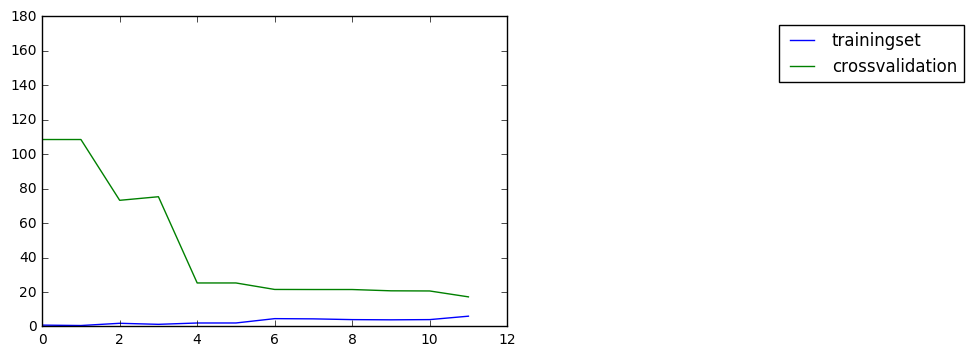

In [337]:
plt.plot(range(12),cost_lst, label='trainingset')
plt.plot(range(12),cost_lst_val[0:12], label='crossvalidation')
plt.legend(bbox_to_anchor=(2, 1))  
axes = plt.gca()
#axes.set_xlim([xmin,xmax])
axes.set_ylim([0,180])
axes.set_xlim([0,12])
plt.show()